In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.parser import parse

In [2]:
datos = pd.read_csv("Eros/datos.csv",index_col=0,parse_dates=True)
datos = datos["2019-03-01":"2019-05-31"]
datos = datos[datos.index.dayofweek < 5]
datos = pd.concat([datos.between_time("09:00","14:00"), datos.between_time("15:00","18:00") ])

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


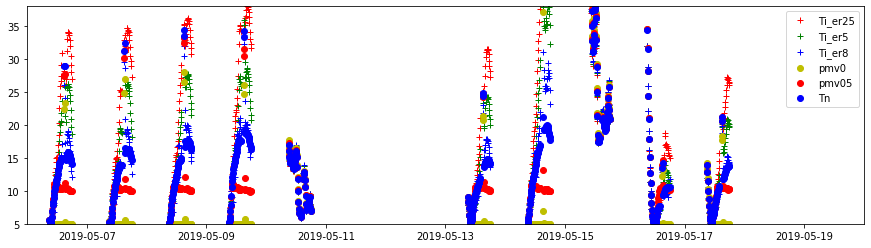

In [3]:
fig, ax = plt.subplots(figsize=(15,4))

fecha1 = parse("2019-05-06")
fecha2 = fecha1 + pd.Timedelta("14D")

ax.set_xlim(fecha1,fecha2)
ax.set_ylim(5,38)

# ax.plot(datos.To_pmv0,'k+',label="To")

ax.plot(datos.ppd_er25, 'r+',label="Ti_er25")
ax.plot(datos.ppd_er5,  'g+',label="Ti_er5")
ax.plot(datos.ppd_er8,  'b+',label="Ti_er8")
ax.plot(datos.ppd_pmv0, 'yo',label="pmv0")
ax.plot(datos.ppd_pmv05,'ro',label="pmv05")
ax.plot(datos.ppd_Tn,   'bo',label="Tn")


ax.legend(loc='best')

In [4]:
datos.columns

Index(['To_CB', 'Ti_CB', 'D7:Zone Mean Radiant Temperature [C](TimeStep)_CB',
       'DT7:Zone Mean Air Temperature [C](TimeStep)_CB',
       'DT7:Zone Mean Radiant Temperature [C](TimeStep)_CB', 'pmv_CB',
       'ppd_CB',
       'DT7:AFN Zone Infiltration Air Change Rate [ach](TimeStep)_CB',
       'D7:AFN Zone Infiltration Air Change Rate [ach](TimeStep)_CB',
       'DT7:AFN Zone Infiltration Volume [m3](TimeStep)_CB',
       ...
       'CW DEMAND SIDE OUTLET PIPE:Pipe Mass Flow Rate [kg/s](TimeStep)_er8',
       'COOLING DEMAND SIDE INLET PIPE:Pipe Inlet Temperature [C](TimeStep)_er8',
       'SUPPLY SIDE OUTLET PIPE:Pipe Inlet Temperature [C](TimeStep)_er8',
       'CW DEMAND SIDE OUTLET PIPE:Pipe Inlet Temperature [C](TimeStep)_er8',
       'COOLING DEMAND SIDE INLET PIPE:Pipe Outlet Temperature [C](TimeStep)_er8',
       'SUPPLY SIDE OUTLET PIPE:Pipe Outlet Temperature [C](TimeStep)_er8',
       'CW DEMAND SIDE OUTLET PIPE:Pipe Outlet Temperature [C](TimeStep)_er8',
       'COOLI

In [5]:
casos = ["_CB","_er25","_er5","_er8","_Tn","_pmv05","_pmv0"]

# $\overline{ PMV}$ y $\overline{ PPD}$
SIN discriminar datos

In [6]:
metrica = "pmv"


tmp = [metrica+caso for caso in casos]
for caso in tmp:
    print(caso,datos[caso].mean().round(2))
    
print("\n")
metrica = 'ppd'
tmp = [metrica+caso for caso in casos]
for caso in tmp:
    print(caso,datos[caso].mean().round(2))

pmv_CB 0.17
pmv_er25 0.11
pmv_er5 0.05
pmv_er8 0.01
pmv_Tn -0.01
pmv_pmv05 -0.03
pmv_pmv0 -0.27


ppd_CB 19.64
ppd_er25 17.27
ppd_er5 15.52
ppd_er8 14.4
ppd_Tn 14.54
ppd_pmv05 13.74
ppd_pmv0 11.37


# $\overline{ PMV_{max}}$  y $\overline{ PMV_{min}}$

usando solo los positivos y los negativos, respectivamente

In [7]:
metrica = "pmv"

tmp = [metrica+caso for caso in casos]
for caso in tmp:
    print(caso,datos[datos[caso]>0][caso].resample("1D").max().mean().round(2))

pmv_CB 1.0
pmv_er25 0.87
pmv_er5 0.79
pmv_er8 0.76
pmv_Tn 0.77
pmv_pmv05 0.79
pmv_pmv0 0.68


# $\overline{\Delta PMV}$ 
Con o sin diferencia, da casi lo mismo dado que casi no hay valores
negativos, pero debe ser el valor absoluto 

In [8]:

metrica = "pmv"
tmp     = [metrica + caso for caso in casos]
for caso in tmp[1:]:
#     print(caso,(np.abs(datos.pmv_CB - datos[caso])).mean().round(2))
    print(caso,(datos.pmv_CB - datos[caso]).mean().round(2))

pmv_er25 0.07
pmv_er5 0.12
pmv_er8 0.17
pmv_Tn 0.18
pmv_pmv05 0.2
pmv_pmv0 0.44


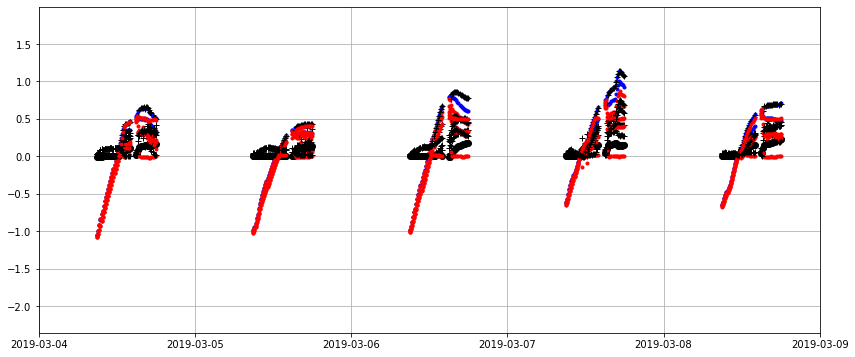

In [9]:
fig, ax = plt.subplots(figsize=(14,6))

fecha1 = parse("2019-03-04")
fecha2 = fecha1 + pd.Timedelta("5D")

ax.set_xlim(fecha1,fecha2)

ax.plot(datos.pmv_CB   ,'b.')

ax.plot(datos.pmv_er25 ,'b.')
ax.plot(datos.pmv_CB-datos.pmv_er25,'ko')

ax.plot(datos.pmv_er5  ,'r.')
ax.plot(datos.pmv_CB-datos.pmv_er5,'k+')


ax.plot(datos.pmv_er8  ,'r.')
ax.plot(datos.pmv_CB-datos.pmv_er8,'k+')


ax.plot(datos.pmv_Tn   ,'r.')
ax.plot(datos.pmv_CB-datos.pmv_Tn,'k+')


ax.plot(datos.pmv_pmv0 ,'r.')
ax.plot(datos.pmv_CB-datos.pmv_pmv0,'k+')



ax.plot(datos.pmv_pmv05,'r.')
ax.plot(datos.pmv_CB-datos.pmv_pmv05,'k+')

ax.grid()


In [10]:
metrica = "pmv"

tmp = [metrica+caso for caso in casos]
for caso in tmp:
    print(caso,datos[datos[caso]>0][caso].resample("1D").max().mean().round(2))

pmv_CB 1.0
pmv_er25 0.87
pmv_er5 0.79
pmv_er8 0.76
pmv_Tn 0.77
pmv_pmv05 0.79
pmv_pmv0 0.68


In [11]:
metrica = "ppd"
casos = ["_CB","_er25","_er5","_er8","_Tn","_pmv05","_pmv0"]

casos = [metrica+caso for caso in casos]
for caso in casos:
    print(caso,datos[caso].resample("1D").max().mean().round(0))

ppd_CB 38.0
ppd_er25 34.0
ppd_er5 33.0
ppd_er8 32.0
ppd_Tn 33.0
ppd_pmv05 33.0
ppd_pmv0 31.0


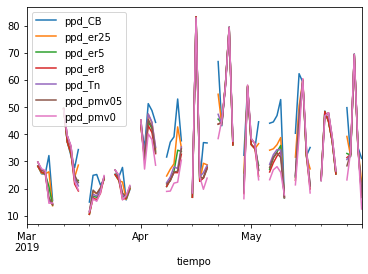

In [12]:
datos[casos].resample("1D").max().plot()

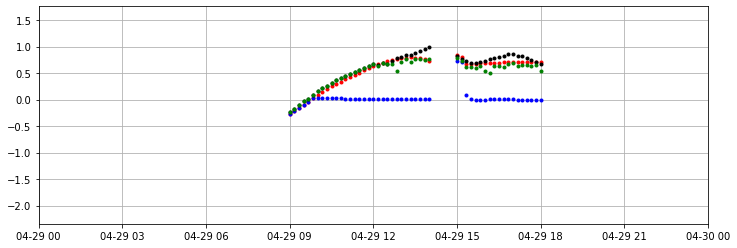

In [13]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse("2019-04-29")
fecha2 = fecha1 + pd.Timedelta("1D")

ax.set_xlim(fecha1,fecha2)
# ax.set_ylim(5,38)

ax.plot(datos.pmv_Tn,  'r.')
ax.plot(datos.pmv_pmv0,'b.')
ax.plot(datos.pmv_er25,'k.')
ax.plot(datos.pmv_er8, 'g.')
ax.grid()
# ax.plot(datos.ppd_er25, 'r+',label="Ti_er25")